In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as ss

In [16]:
mu_true = np.array([0.0, 8.0])
sigma_true = np.array([1.0, 3.0])
pi_true = np.array([0.4, 0.6])
n_obs = 500

X = np.empty(shape=(n_obs, 2))

component_dists = [
    ss.norm(loc=mu_true[i], scale=sigma_true[i]) for i in range(2)
]

z_i = ss.bernoulli(pi_true[0]).rvs(n_obs)
y_i = component_dists[0].rvs(n_obs) * z_i + component_dists[1].rvs(n_obs) * (1-z_i)

### Model 1: don't estimate assignments

The joint distribution is

\begin{align*}
    p\left(Y, \mu_{1:2}, \sigma_{1:2}, \pi\right) & = p\left(Y\, \middle| \, \mu_{1:2}, \sigma_{1:2}, \pi\right) p\left(\mu_{1:2}, \sigma_{1:2}, \pi\right) \\
    & = p\left(Y\, \middle| \, \mu_{1:2}, \sigma_{1:2}, \pi\right) p\left(\mu_{1:2}\right)p\left(\sigma_{1:2}\right)p\left(\pi\right) \\
\end{align*}


\begin{align*}
    p\left(\mu_1 \, \middle| \, Y, \mu_{2}, \sigma_{1:2}, \pi\right) & = p\left(Y, \mu_{1:2}, \sigma_{1:2}, \pi\right) / p\left(Y, \mu_2, \sigma_{1:2}, \pi\right) \\
     & \propto p\left(Y\, \middle| \, \mu_{1:2}, \sigma_{1:2}, \pi\right) p\left(\mu_{1}\right) \\
\end{align*}


\begin{align*}
    \log p\left(\mu_1\,\middle|\, Y, \mu_2, \sigma_{1:2}, \pi\right) + \text{const.} & = \log p\left(Y\,\middle|\,\mu_{1:2}, \sigma_{1:2}, \pi\right) + \log p\left(\mu_1\right) \\
\end{align*}

\begin{align*}
    p\left(Y\, \middle| \, \mu_{1:2}, \sigma_{1:2}, \pi\right) & = \prod_{i=1}^{n_{\text{obs}}} p\left(y_i \, \middle| \, \mu_{1:2}, \sigma_{1:2}, \pi\right) \\
    \log p\left(Y\, \middle| \, \mu_{1:2}, \sigma_{1:2}, \pi\right) & = \sum_{i=1}^{n_{\text{obs}}} \log p\left(y_i \, \middle| \, \mu_{1:2}, \sigma_{1:2}, \pi\right) \\
\end{align*}

\begin{align*}
    p\left(y\, \middle| \, \mu_{1:2}, \sigma_{1:2}, \pi\right) & = \pi \mathcal{N}\left(y; \mu_1, \sigma_1\right) + \left(1-\pi\right)\mathcal{N}\left(y; \mu_2, \sigma_2\right) \\
\end{align*}

so we have

\begin{align*}
    p\left(\mu_1\, \middle| \, Y, \mu_2, \sigma_{1:2}, \pi\right) & \propto \prod_{i=1}^{N_{\text{obs}}} \left[\pi \mathcal{N}\left(y_i; \mu_1, \sigma_1\right) + \left(1 - \pi\right)\mathcal{N}\left(y_i; \mu_2, \sigma_2\right) \right] \\
\end{align*}

In [17]:
mu = np.array([4.0, 5.0])
sigma = np.array([1.0, 1.0])
pi = np.array([0.5, 0.5])

# def p_mu_j(Y, mu, sigma, pi):
c_dists = [
    ss.norm(loc=mu[i], scale=sigma[i]) for i in range(len(pi))
]



In [56]:
mu_1 = np.linspace(0, 5, 100)


p_mu_1 = np.zeros_like(mu_1)

for idx, mu_1_s in enumerate(mu_1):

    preds = []
    c_dists = [
        ss.norm(loc=mu_1_s, scale=sigma[0]),
        ss.norm(loc=mu[1], scale=sigma[1])
    ]
    for i in range(len(pi)):
        preds.append(c_dists[i].pdf(y_i))
    preds = np.stack(preds, axis=1)

    like_obs = preds @ pi
    p_mu_1[idx] = np.log(like_obs).sum()

In [73]:
import random

def categ(c):
    cm = np.max(c)
    while True:
        x = np.random.randint(0, len(c) - 1)
        y = cm - random.expovariate(1)
        if y < c[x]:
            return x

In [58]:
categ(p_mu_1)

1

In [67]:
mu_1[categ(p_mu_1)]

0.10101010101010101

In [71]:
mu

array([4., 5.])

<BarContainer object of 100 artists>

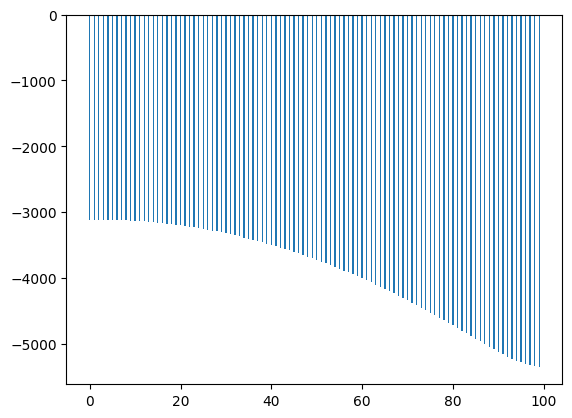

In [75]:
plt.bar(range(len(p_mu_1)), p_mu_1, width=0.3)